In [9]:
%load_ext autoreload
%autoreload 2

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [10]:
import dynadojo as dd
import numpy as np

(<Figure size 640x480 with 1 Axes>, <Axes: >)

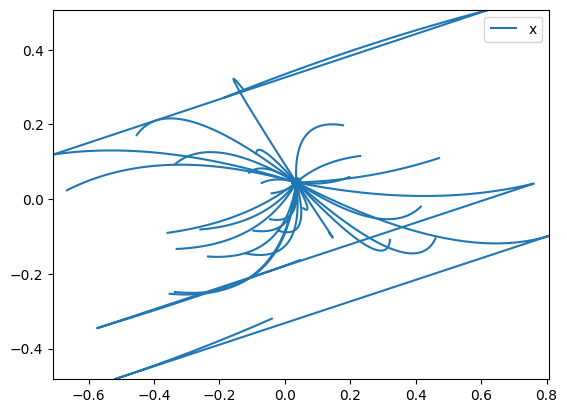

In [11]:
latent_dim = 2
embed_dim = 4  # NOTE: embed_dim must be <= 2 * latent_dim
n = 100
timesteps = 50
challenge = dd.systems.SNNSystem(latent_dim, embed_dim)
x0 = challenge.make_init_conds(n)
x = challenge.make_data(x0,  control=np.zeros((n, timesteps, embed_dim)), timesteps=timesteps)
dd.utils.lds.plot([x], target_dim=2, labels=["x"], max_lines=30)

In [12]:
model = dd.baselines.dnn.DNN(embed_dim, timesteps, activation="tanh", max_control_cost=0)
model.fit(x, epochs=1000, verbose='auto')

Epoch 1/1000
4/4 [==============================] - 2s 6ms/step - loss: 1.4874
Epoch 2/1000
4/4 [==============================] - 0s 8ms/step - loss: 1.4318
Epoch 3/1000
4/4 [==============================] - 0s 9ms/step - loss: 1.3792
Epoch 4/1000
4/4 [==============================] - 0s 11ms/step - loss: 1.3285
Epoch 5/1000
4/4 [==============================] - 0s 9ms/step - loss: 1.2795
Epoch 6/1000
4/4 [==============================] - 0s 11ms/step - loss: 1.2324
Epoch 7/1000
4/4 [==============================] - 0s 11ms/step - loss: 1.1870
Epoch 8/1000
4/4 [==============================] - 0s 8ms/step - loss: 1.1430
Epoch 9/1000
4/4 [==============================] - 0s 10ms/step - loss: 1.1006
Epoch 10/1000
4/4 [==============================] - 0s 12ms/step - loss: 1.0597
Epoch 11/1000
4/4 [==============================] - 0s 11ms/step - loss: 1.0203
Epoch 12/1000
4/4 [==============================] - 0s 8ms/step - loss: 0.9823
Epoch 13/1000
4/4 [========================

x_err=0.0055383064194385444


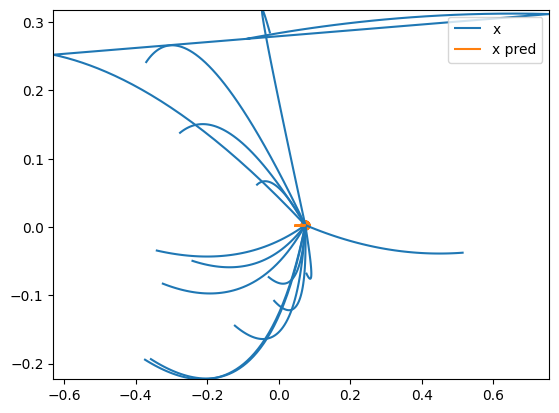

In [13]:
x_pred = model.predict(x[:, 0], 50)
dd.utils.lds.plot([x, x_pred], target_dim=min(3, latent_dim), labels=["x", "x pred"], max_lines=15)
x_err = challenge.calc_error(x, x_pred)
print(f"{x_err=}")